In [4]:
import k3d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style(style="darkgrid")

## Observables

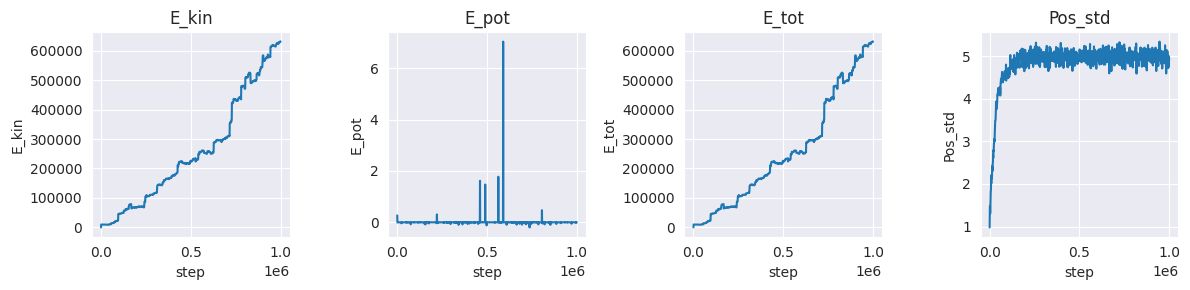

In [2]:
observables = pd.read_csv('observables.txt', sep='\t')

fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True)

for ax, col in zip(axes, observables.columns[1:], strict=True):
    sns.lineplot(data=observables, x='step', y=col, ax=ax)
    ax.set_title(col)

for ax in axes:
    ax.ticklabel_format(useOffset=False)
plt.tight_layout()
plt.show()

# Trajectory

In [6]:
trajectory = pd.read_csv('trajectory.txt', sep='\t')

positions_by_step = [group[['x','y','z']].values for _, group in trajectory.groupby('step')]

colors = np.random.randint(0, 0xFFFFFF, size=positions_by_step[0].shape[0]).astype(np.uint32)

trajplot = k3d.plot(
    grid=[-5, -5, -5, 5, 5, 5], 
    grid_auto_fit=False,
    camera_auto_fit=True
)
points = k3d.points(positions_by_step[0], point_size=1, colors=colors,)
trajplot += points
trajplot.display()

points.positions = {i: pos for i, pos in enumerate(positions_by_step)}

/home/giulio/projects/frog/.venv/lib/python3.12/site-packages/traittypes/traittypes.py:98: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()